In [1]:
import os

import iris
import iris.plot as iplt
import iris.quickplot as qplt

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import numpy as np

import xarray

In [2]:
def load_xarray(fname):
    cubes = iris.load_cube(fname)
    cubes_x = xarray.DataArray.from_iris(cubes)
    return cubes_x

In [3]:
def get_proj(fname):
    cubes = iris.load_cube(fname)
    cubes_crs = cubes.coord_system().as_cartopy_crs()
    return cubes_crs

In [5]:
vv_p_filename = '/home/users/jconey/ukv/dat/2021-01-10/vv/20210110T0900Z-PT0009H00M-wind_vertical_velocity_on_pressure_levels.nc'
vv_h_filename = '/home/users/jconey/ukv/dat/2021-01-10/vv/20210110T0900Z-PT0009H00M-wind_vertical_velocity_on_height_levels.nc'
#vv = load_xarray(vv_h_filename)
proj = get_proj(vv_h_filename)


OSError: One or more of the files specified did not exist:
    * "/home/users/jconey/ukv/dat/2021-01-10/vv/20210110T0900Z-PT0009H00M-wind_vertical_velocity_on_height_levels.nc" didn't match any files

In [5]:
proj

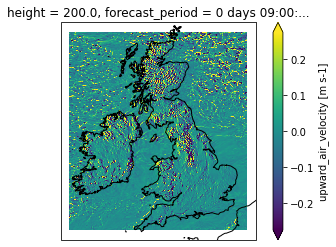

In [6]:
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
p = vv[8,250:750,300:750].plot.pcolormesh(
    robust=True,
    ax=ax,
    #pressure: 8==700 hPa; height: 24==3000 m.
    cmap='viridis',
    rasterized=True,
   # size=6
    #vmin=-2,vmax=2,
 #   levels=np.arange(-2,2.05,step=0.2)
)
#for c in p.collections:
#    c.set_edgecolor("face")
plt.savefig('vv_700hPa.pdf')
#p.axes.set_global()

In [6]:
vv[8,4,:]

<xarray.DataArray 'upward_air_velocity' (projection_x_coordinate: 1042)>
dask.array<getitem, shape=(1042,), dtype=float32, chunksize=(1042,), chunktype=numpy.ndarray>
Coordinates:
    height                   float32 200.0
    projection_y_coordinate  float32 -1.028e+06
  * projection_x_coordinate  (projection_x_coordinate) float32 -1.158e+06 ......
    forecast_period          timedelta64[ns] ...
    forecast_reference_time  datetime64[ns] ...
    time                     datetime64[ns] ...
Attributes: (12/14)
    standard_name:                upward_air_velocity
    units:                        m s-1
    history:                      2021-01-10T01:10:04Z: StaGE Decoupler
    institution:                  Met Office
    mosg__forecast_run_duration:  PT54H
    mosg__grid_domain:            uk_extended
    ...                           ...
    mosg__model_configuration:    uk_det
    source:                       Met Office Unified Model
    title:                        UKV Model Forecast on UK 2 km Standard Grid
    um_version:                   11.5
    Conventions:                  CF-1.7, UKMO-1.0
    least_significant_digit:      4

In [7]:
vv.attrs

{'standard_name': 'upward_air_velocity',
 'units': 'm s-1',
 'history': '2021-01-10T01:10:04Z: StaGE Decoupler',
 'institution': 'Met Office',
 'mosg__forecast_run_duration': 'PT54H',
 'mosg__grid_domain': 'uk_extended',
 'mosg__grid_type': 'standard',
 'mosg__grid_version': '1.6.0',
 'mosg__model_configuration': 'uk_det',
 'source': 'Met Office Unified Model',
 'title': 'UKV Model Forecast on UK 2 km Standard Grid',
 'um_version': '11.5',
 'Conventions': 'CF-1.7, UKMO-1.0',
 'least_significant_digit': 4}

In [14]:
def sliceplot(fname,y_coord):
    cubes = iris.load_cube(fname)
    c2 = iris.load_cube('/home/users/jconey/ukv/dat/2021-03-26/orog/20210326T0900Z-PT0003H00M-height_of_orography.nc')
    slice1 = cubes.extract(iris.Constraint(projection_y_coordinate=y_coord))
    slice2 = c2.extract(iris.Constraint(projection_y_coordinate=y_coord))
    #return slice1
    slice1=slice1[:,539:609]
    slice2=slice2[539:609]
    #print(slice1)
    qplt.plot(slice2,c='k')
    qplt.contourf(slice1, coords=['projection_x_coordinate', 'height'],cmap='RdBu_r')
   # plt.tight_layout()
    plt.show()

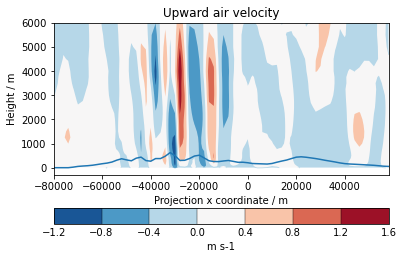

In [9]:
sliceplot(vv_h_filename,-42000)

Cloud Cover

In [11]:
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import cartopy.feature as cfeature

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


def sliceplot2(fname,y_coord,xmin,xmax):
    cubes = iris.load_cube(fname)
    c2 = iris.load_cube('/home/users/jconey/ukv/dat/pendle/20211120T1200Z-PT0027H00M-height_of_orography.nc')
    slice1 = cubes.extract(iris.Constraint(projection_y_coordinate=y_coord))
    slice2 = c2.extract(iris.Constraint(projection_y_coordinate=y_coord))
    #return slice1
    #x1=450
    #x2=609
    y1=y_coord
    y2=y_coord
    slice1=slice1[:20,xmin:xmax]
    slice2=slice2[xmin:xmax]
    #print(slice1)
    
    xs=[cubes[12,509,x1].coord('projection_x_coordinate').points,cubes[12,509,x2].coord('projection_x_coordinate').points]
    
    #xs = [xmin,xmax]
    ys=[y1,y2]
   # print(slice1)
   # plt.gca().gridlines(draw_labels=True)
    
    # Plot #1: contourf with axes longitude from -180 to 180
    fig = plt.figure(figsize=(12, 16))
    plt.subplot(211)
    qplt.plot(slice2,c='k')
    levels=np.arange(0,1.2,0.2)
    qplt.contourf(slice1, coords=['projection_x_coordinate', 'height'],cmap='Blues_r',levels=levels)
    # Plot #2: contourf with axes longitude from 0 to 360
    proj = get_proj(fname)
    
    ax = plt.subplot(212, projection=proj)
    cmap = plt.get_cmap('gist_earth')
    new_cmap = truncate_colormap(cmap, 0.3, 1)    
   # new_cmap.set_under('white')
    qplt.contourf(c2, 15,cmap=new_cmap)
    ax.plot(xs, ys,c='white')
    plt.gca().coastlines()
    plt.gca().add_feature(cfeature.OCEAN,zorder=100,edgecolor='k')
    
    fig.show()
    return proj
   # plt.tight_layout()

In [220]:
c2[0]

<xarray.DataArray 'surface_altitude' (projection_x_coordinate: 1042)>
array([  0.    ,   0.    ,   0.    , ..., 373.375 , 403.    , 428.1875],
      dtype=float32)
Coordinates:
    projection_y_coordinate  float32 -1.036e+06
  * projection_x_coordinate  (projection_x_coordinate) float32 -1.158e+06 ......
    forecast_period          timedelta64[ns] 1 days 03:00:00
    forecast_reference_time  datetime64[ns] 2021-11-19T09:00:00
    time                     datetime64[ns] 2021-11-20T12:00:00
Attributes:
    standard_name:  surface_altitude
    units:          m
    grid_mapping:   lambert_azimuthal_equal_area

In [12]:
cubes=xarray.open_dataset(cloudcover)

In [14]:
def get_index(x):
    f = int((x+1158000)/2000)
    return f 

In [26]:
x1 = get_index(27478)
x2 = get_index(53688)
x1,x2

(592, 605)

In [29]:
cloudcover = '/home/users/jconey/20211218T1200Z-PT0024H00M-cloud_amount_on_height_levels.nc'#'/home/users/jconey/ukv/dat/pendle/20211120T1200Z-PT0027H00M-cloud_amount_on_height_levels.nc'
cloudcover = '/home/users/jconey/20211218T0900Z-PT0021H00M-cloud_amount_on_height_levels.nc'#'/home/users/jconey/ukv/dat/pendle/20211120T1200Z-PT0027H00M-cloud_amount_on_height_levels.nc'

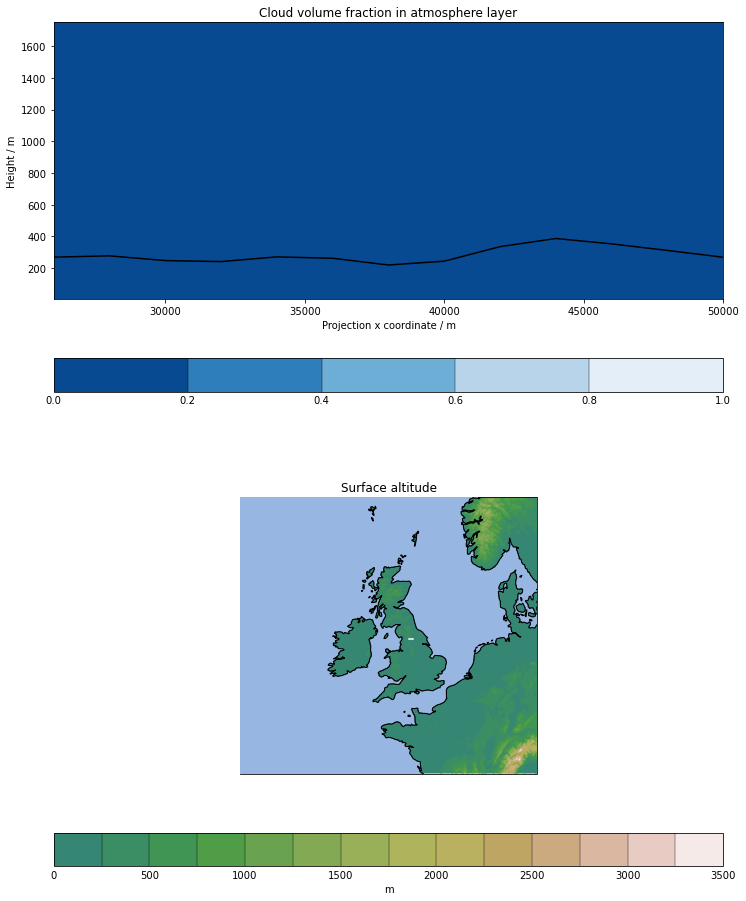

In [30]:
proj = sliceplot2(cloudcover,-96502,x1,x2)
#plt.savefig('cloudfrac.pdf')

In [24]:
proj.transform_point( -1.680652, 54.031398, ccrs.PlateCarree())

(53688.26012194702, -96374.56892676071)

In [25]:
proj.transform_point(-2.080652,54.031398,  ccrs.PlateCarree())

(27478.539704977276, -96605.23820615964)

In [19]:
proj.transform_point(-1.880652,54.031398,  ccrs.PlateCarree())

(39928.3397027921, -96514.24534758637)

Cloud Liquid water path

In [10]:
cw_x = load_xarray('/home/users/jconey/ukv/dat/2021-01-10/cloud_water/20210110T0900Z-PT0009H00M-cloud_water_mixing_ratio_on_height_levels.nc')
cubes_crs =  get_proj('/home/users/jconey/ukv/dat/2021-01-10/cloud_water/20210110T0900Z-PT0009H00M-cloud_water_mixing_ratio_on_height_levels.nc')

tmp_x=load_xarray('/home/users/jconey/ukv/dat/2021-01-10/20210110T0900Z-PT0009H00M-temperature_on_height_levels.nc')

prs_x = load_xarray('/home/users/jconey/ukv/dat/2021-01-10/20210110T0900Z-PT0009H00M-pressure_on_height_levels.nc')

In [11]:
r = 287.058

In [12]:
density = (100*prs_x)/((tmp_x+273.15)*r)

In [13]:
new=density*cw_x

In [14]:
new

<xarray.DataArray (height: 33, projection_y_coordinate: 970, projection_x_coordinate: 1042)>
dask.array<mul, shape=(33, 970, 1042), dtype=float32, chunksize=(33, 970, 1042), chunktype=numpy.ndarray>
Coordinates:
  * height                   (height) float32 5.0 10.0 20.0 ... 5.5e+03 6e+03
  * projection_y_coordinate  (projection_y_coordinate) float32 -1.036e+06 ......
  * projection_x_coordinate  (projection_x_coordinate) float32 -1.158e+06 ......
    forecast_period          timedelta64[ns] 09:00:00
    forecast_reference_time  datetime64[ns] 2021-01-10
    time                     datetime64[ns] 2021-01-10T09:00:00

In [15]:
xarray.__version__

'0.17.0'

In [17]:
l_water_path = new.integrate("height")

In [28]:
l_water_path = new.sum('height')

In [18]:
l_water_path

<xarray.DataArray (projection_y_coordinate: 970, projection_x_coordinate: 1042)>
dask.array<sum-aggregate, shape=(970, 1042), dtype=float32, chunksize=(970, 1042), chunktype=numpy.ndarray>
Coordinates:
  * projection_y_coordinate  (projection_y_coordinate) float32 -1.036e+06 ......
  * projection_x_coordinate  (projection_x_coordinate) float32 -1.158e+06 ......
    forecast_period          timedelta64[ns] 09:00:00
    forecast_reference_time  datetime64[ns] 2021-01-10
    time                     datetime64[ns] 2021-01-10T09:00:00

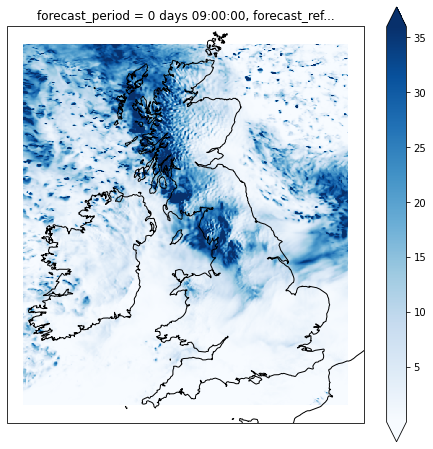

In [19]:
fig,ax = plt.subplots(subplot_kw=dict(projection=cubes_crs),figsize=(8,8))
ax.coastlines(resolution='10m')
p = l_water_path[250:750,300:750].plot.pcolormesh(
    rasterized = True,
    cmap='Blues',
    robust=True,
)
#for c in p.collections:
#    c.set_edgecolor("face")
plt.savefig('liquid_water_path.pdf')
#p.axes.set_global()

In [25]:
l_water_path[0,1].values

array(0.00307322, dtype=float32)

In [31]:
cubes=xarray.open_dataset('/home/users/jconey/20211218T1200Z-PT0024H00M-visibility_at_screen_level.nc')

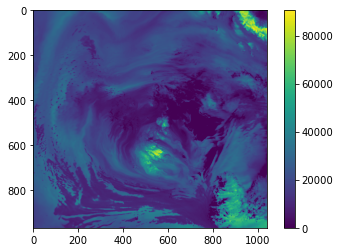

In [41]:
plt.imshow(cubes['visibility_in_air'],vmin=0)
plt.colorbar()